In [1]:
import pickle
import pandas as pd
import numpy as np
import time


df = pickle.load( open( "files/df.pickle", "rb" ) )
df['Tweet'] = df['Tweet'].astype(str)
df['Words'] = df['Tweet'].str.count(' ') + 1
df = df[df['Words']>=4]

print('tweets',df.shape[0])
print('Russian',np.sum(df['Category']))

tweets 8488073
Russian 2285628


In [2]:
cv = pickle.load( open( "models/countVectorizer.pickle", "rb" ) )
scaler = pickle.load( open( "models/scaler.pickle", "rb" ) )
lr = pickle.load( open( "models/regression.pickle", "rb" ) )


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# dct = {}
# vocab = cv.vocabulary_
# k = 0
# for n, coef in enumerate(lr.coef_[0]):
#     if coef > 0:
#         dct[list(vocab.keys())[list(vocab.values()).index(n)]] = (k)
#         k += 1
# cvs = TfidfVectorizer(vocabulary=dct, ngram_range=(2,5))
# cvs.fit(df['Processed'])
X = cv.transform(df[df['Category']==1]['Processed'])

In [4]:
X

<2285628x16107 sparse matrix of type '<class 'numpy.float64'>'
	with 41027360 stored elements in Compressed Sparse Row format>

iteration: 1 of max_iter: 3
iteration: 2 of max_iter: 3
iteration: 3 of max_iter: 3
iteration: 1 of max_iter: 3
iteration: 2 of max_iter: 3
iteration: 3 of max_iter: 3
iteration: 1 of max_iter: 3
iteration: 2 of max_iter: 3
iteration: 3 of max_iter: 3
iteration: 1 of max_iter: 3
iteration: 2 of max_iter: 3
iteration: 3 of max_iter: 3
iteration: 1 of max_iter: 3
iteration: 2 of max_iter: 3
iteration: 3 of max_iter: 3
iteration: 1 of max_iter: 3
iteration: 2 of max_iter: 3
iteration: 3 of max_iter: 3
iteration: 1 of max_iter: 3
iteration: 2 of max_iter: 3
iteration: 3 of max_iter: 3


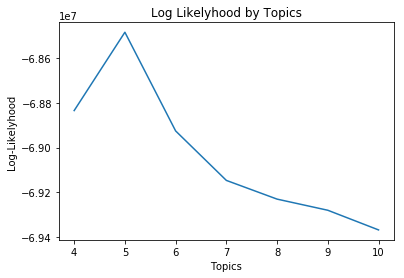

In [21]:
import time
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
import pyLDAvis
import pyLDAvis.sklearn


start = time.time()

lst = [n+4 for n in range(7)]
perplexity = []
for n in lst:
    model = LatentDirichletAllocation(n, verbose=1, max_iter=3)
    model.fit(X)
    perplexity.append(model.score(X))
end = time.time()


import matplotlib.pyplot as plt

plt.plot(lst,perplexity)
plt.title("Log Likelyhood by Topics")
plt.xlabel('Topics')
plt.ylabel('Log-Likelyhood')
plt.show()

In [37]:
start = time.time()
model = LatentDirichletAllocation(5, verbose=1, max_iter=10)
model.fit(X)
end = time.time()
print('{} Number of tweets took {:.0f} s with Perplexity {:.3f}'.format(X.shape[0],end-start, model.perplexity(X)))

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10
2285628 Number of tweets took 3765 s with Perplexity 2581.533


In [38]:

pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(model, X, cv, sort_topics=False)

C:\Users\darin\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.131273  0.006927       1        1  21.981846
1      0.483502  0.022877       2        1  16.724918
2     -0.082529 -0.300554       3        1  14.580375
3     -0.118047  0.181626       4        1  28.555755
4     -0.151653  0.089123       5        1  18.157106, topic_info=      Category           Freq  \
10113  Default  238680.000000   
10159  Default  191884.000000   
10182  Default  152068.000000   
10190  Default  118049.000000   
0      Default   51555.000000   
1      Default   39132.000000   
5239   Default   41878.000000   
5256   Default   39821.000000   
10048  Default   39240.000000   
10128  Default   36134.000000   
5265   Default   35844.000000   
7729   Default  117850.000000   
8145   Default   58044.000000   
10167  Default   32857.000000   
5270   Default   31984.000000   
2      Default   27672.000000   
10185  Default   29608.000000   
8233   Default   26845.000000   
3      Default   17831.000000   
10054  Default   16046.000000   
10132  Default   14819.000000   
10169  Default   14013.000000   
4602   Default   78511.000000   
8248   Default   12490.000000   
7759   Default   30232.000000   
6214   Default   23075.000000   
8646   Default   52174.000000   
4866   Default   35242.000000   
6313   Default   64763.000000   
3798   Default   22686.000000   
...        ...            ...   
1326    Topic5    5525.238573   
10567   Topic5    7593.094449   
3726    Topic5    3466.968910   
3012    Topic5    3367.781129   
8878    Topic5    7400.245463   
11250   Topic5    9467.524396   
10993   Topic5    2462.760582   
10261   Topic5   13917.610011   
10267   Topic5    7368.929180   
4041    Topic5    4710.208017   
215     Topic5    9128.498746   
10465   Topic5    4169.597567   
5279    Topic5    5242.225114   
5271    Topic5   16158.673246   
10251   Topic5    8140.195052   
6214    Topic5   10556.878779   
6413    Topic5    6640.620689   
8849    Topic5    9643.026828   
8646    Topic5   16883.707812   
2961    Topic5    6326.364166   
2357    Topic5    7176.695931   
3798    Topic5    8770.272161   
10804   Topic5    5877.770196   
6934    Topic5    6434.073845   
7325    Topic5    6266.349419   
949     Topic5   12999.230307   
4602    Topic5   13459.319912   
6313    Topic5   11131.693226   
7729    Topic5   11552.014372   
5020    Topic5    5519.089043   

                                                    Term          Total  \
10113                                            nnp nnp  238680.000000   
10159                                        nnp nnp nnp  191884.000000   
10182                                    nnp nnp nnp nnp  152068.000000   
10190                                nnp nnp nnp nnp nnp  118049.000000   
0                              _at_someone_ _at_someone_   51555.000000   
1                 _at_someone_ _at_someone_ _at_someone_   39132.000000   
5239                                              jj nnp   41878.000000   
5256                                          jj nnp nnp   39821.000000   
10048                                         nnp _link_   39240.000000   
10128                                     nnp nnp _link_   36134.000000   
5265                                      jj nnp nnp nnp   35844.000000   
7729                                               nn nn  117850.000000   
8145                                            nn nn nn   58044.000000   
10167                                 nnp nnp nnp _link_   32857.000000   
5270                                  jj nnp nnp nnp nnp   31984.000000   
2      _at_someone_ _at_someone_ _at_someone_ _at_som...   27672.000000   
10185                             nnp nnp nnp nnp _link_   29608.000000   
8233                                         nn nn nn nn   26845.000000   
3      _at_someone_ _at_someone_ _at_someone_ _at_som...   17831.000000   
10054                           

In [39]:
pickle.dump( model, open( "models/lda_model.pickle", "wb" ) )